In [37]:
import pyodbc

# Set up your connection string
server = 'sales-lt-server.database.windows.net'
database = 'SalesLT'
username = 'Alain'
password = 'Monterrey2025'

# Define the connection string for SQL Server (Azure)
conn_str = (
    f'DRIVER={{ODBC Driver 18 for SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password}'
)

# Establish the connection
try:
    conn = pyodbc.connect(conn_str)
    print("Connected to the Azure SQL Database successfully!")

except pyodbc.Error as e:
    print(f"Error connecting to the database: {e}")


query = "SELECT * FROM SalesLT.customer"

Connected to the Azure SQL Database successfully!


In [38]:
import pandas as pd

df = pd.read_sql(query, conn)
print(df.head())
conn.close()

/var/folders/8n/8bjdlpfd1fxggmklmx0rdw8w0000gn/T/ipykernel_2860/3455569144.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   CustomerID  NameStyle Title FirstName MiddleName    LastName Suffix  \
0           1      False   Mr.   Orlando         N.         Gee   None   
1           2      False   Mr.     Keith       None      Harris   None   
2           3      False   Ms.     Donna         F.    Carreras   None   
3           4      False   Ms.     Janet         M.       Gates   None   
4           5      False   Mr.      Lucy       None  Harrington   None   

                  CompanyName               SalesPerson  \
0                A Bike Store   adventure-works\pamela0   
1          Progressive Sports    adventure-works\david8   
2    Advanced Bike Components  adventure-works\jillian0   
3       Modular Cycle Systems  adventure-works\jillian0   
4  Metropolitan Sports Supply      adventure-works\shu0   

                   EmailAddress         Phone  \
0  orlando0@adventure-works.com  245-555-0173   
1    keith0@adventure-works.com  170-555-0127   
2    donna0@adventure-works.com  279-555-0130   
3   

In [39]:
df.head()

,CustomerID,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,CompanyName,SalesPerson,EmailAddress,Phone,PasswordHash,PasswordSalt,rowguid,ModifiedDate
0,1,False,Mr.,Orlando,N.,Gee,None,A Bike Store,adventure-works\pamela0,orlando0@adventure-works.com,245-555-0173,L/Rlwxzp4w7RWmEgXX+/A7cXaePEPcp+KwQhl2fJL7w=,1KjXYs4=,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2005-08-01
1,2,False,Mr.,Keith,None,Harris,None,Progressive Sports,adventure-works\david8,keith0@adventure-works.com,170-555-0127,YPdtRdvqeAhj6wyxEsFdshBDNXxkCXn+CRgbvJItknw=,fs1ZGhY=,E552F657-A9AF-4A7D-A645-C429D6E02491,2006-08-01
2,3,False,Ms.,Donna,F.,Carreras,None,Advanced Bike Components,adventure-works\jillian0,donna0@adventure-works.com,279-555-0130,LNoK27abGQo48gGue3EBV/UrlYSToV0/s87dCRV7uJk=,YTNH5Rw=,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2005-09-01
3,4,False,Ms.,Janet,M.,Gates,None,Modular Cycle Systems,adventure-works\jillian0,janet1@adventure-works.com,710-555-0173,ElzTpSNbUW1Ut+L5cWlfR7MF6nBZia8WpmGaQPjLOJA=,nm7D5e4=,FF862851-1DAA-4044-BE7C-3E85583C054D,2006-07-01
4,5,False,Mr.,Lucy,None,Harrington,None,Metropolitan Sports Supply,adventure-works\shu0,lucy0@adventure-works.com,828-555-0186,KJqV15wsX3PG8TS5GSddp6LFFVdd3CoRftZM/tP0+R4=,cNFKU4w=,83905BDC-6F5E-4F71-B162-C98DA069F38A,2006-09-01


In [40]:
df.Title.unique()

array(['Mr.', 'Ms.', None, 'Sr.', 'Sra.'], dtype=object)

In [41]:
df.CompanyName.unique()

array(['A Bike Store', 'Progressive Sports', 'Advanced Bike Components',
       'Modular Cycle Systems', 'Metropolitan Sports Supply',
       'Aerobic Exercise Company', 'Associated Bikes',
       'Rural Cycle Emporium', 'Sharp Bikes', 'Bikes and Motorbikes',
       'Bulk Discount Store', 'Catalog Store', 'Center Cycle Shop',
       'Central Discount Store', 'Chic Department Stores',
       'Travel Systems', 'Bike World', 'Eastside Department Store',
       'Coalition Bike Company', 'Commuter Bicycle Store',
       'Cross-Country Riding Supplies', 'Cycle Merchants',
       'Cycles Wholesaler & Mfg.', 'Two Bike Shops', 'Finer Mart',
       'Fitness Hotel', 'Journey Sporting Goods', 'Distant Inn',
       'Healthy Activity Store', 'Frugal Bike Shop',
       'Gear-Shift Bikes Limited', 'Greater Bike Store',
       'Grand Industries', 'Instruments and Parts Company',
       'Kickstands and Accessories Company', 'Latest Accessories Sales',
       'Leading Sales & Repair', 'Largest Bike Store

In [42]:
df.Suffix.unique()

array([None, 'Jr.', 'IV', 'Sr.', 'II', 'PhD'], dtype=object)

In [43]:
df.SalesPerson.unique()

array(['adventure-works\\pamela0', 'adventure-works\\david8',
       'adventure-works\\jillian0', 'adventure-works\\shu0',
       'adventure-works\\linda3', 'adventure-works\\josé1',
       'adventure-works\\garrett1', 'adventure-works\\jae0',
       'adventure-works\\michael9'], dtype=object)

In [54]:
#data = df[['Title', 'CompanyName', 'Suffix', 'SalesPerson', 'ModifiedDate']].copy()
data = df[['CompanyName', 'Suffix', 'SalesPerson', 'ModifiedDate']].copy()


In [45]:
data.head()

,Title,CompanyName,Suffix,SalesPerson,ModifiedDate
0,Mr.,A Bike Store,None,adventure-works\pamela0,2005-08-01
1,Mr.,Progressive Sports,None,adventure-works\david8,2006-08-01
2,Ms.,Advanced Bike Components,None,adventure-works\jillian0,2005-09-01
3,Ms.,Modular Cycle Systems,None,adventure-works\jillian0,2006-07-01
4,Mr.,Metropolitan Sports Supply,None,adventure-works\shu0,2006-09-01


In [ ]:
#data['ModifiedDate'] = data['ModifiedDate'].dt.date

In [55]:
data['ModifiedDate_num'] = (data['ModifiedDate'] - data['ModifiedDate'].min()).dt.days

In [56]:
data.head()

,CompanyName,Suffix,SalesPerson,ModifiedDate,ModifiedDate_num
0,A Bike Store,None,adventure-works\pamela0,2005-08-01,31
1,Progressive Sports,None,adventure-works\david8,2006-08-01,396
2,Advanced Bike Components,None,adventure-works\jillian0,2005-09-01,62
3,Modular Cycle Systems,None,adventure-works\jillian0,2006-07-01,365
4,Metropolitan Sports Supply,None,adventure-works\shu0,2006-09-01,427


In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
X = data[[ 'CompanyName', 'Suffix', 'SalesPerson']]
X_encoded = pd.get_dummies(X, drop_first=True)
y = data['ModifiedDate_num']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score: 0.7060963473307453
MSE: 28928.709545053858


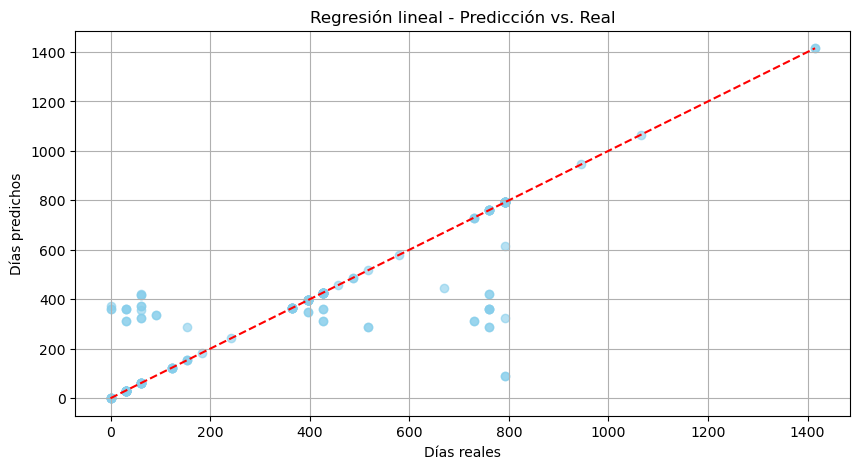

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Días reales')
plt.ylabel('Días predichos')
plt.title('Regresión lineal - Predicción vs. Real')
plt.grid(True)
plt.show()